In [1]:
"""
[Kernel SVM]
Linear SVM can easily kernelized to solve nonlinear separable problem => Kernel SVM.
Generate a nonlinear combination, using function o(), make original features project to a higher dimension space that is linear separable.
    e.g., o(x1, x2) = (z1, z2, z3) = (x1, x2, x1 ^ 2 + x2 ^ 2)
And then we seperate them, and project back to original space, it will have a nonlinear decision boundary.

Kernel fucntion:
    Kernelized is to deal with the problem of hard to create new features.
    k(X(i), X(j)) = transpose(o(X(i))) * o (X(j))
    Radial Basis Function kernel (RBF kernel):
        k(X(i), X(j)) = exp(-((||X(i) - X(j)|| ^ 2) / 2 * σ ^ 2))
                      = exp(-γ(||X(i) - X(j)|| ^ 2))
        Free parameter : γ = 1 / (2 * σ ^ 2)
            γ = 0.1 is cut-off parameter of Gaussian sphere.
            Bigger γ will increase effect of training samples and get a softer decision boundary.
            It's important of controlling overfitting.
    Kernel : Pairwise samples' similarity function. Minus make distance to score of similarity, and will stay between 0 ~ 1.
        => Kenel trick
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from shared import Plot

In [2]:
# Create random noisy XOR datasets
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

Plot datasets...


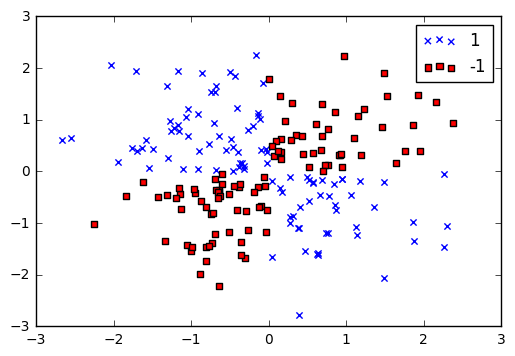

In [3]:
# Plot datasets
print('Plot datasets...')
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label='-1')
plt.ylim(-3.0)
plt.legend()
plt.show()

In [4]:
# Support vector classifier w/ RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

Plot result...


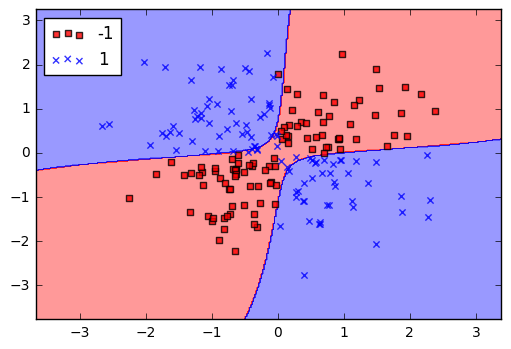

In [5]:
# Plot result
print('Plot result...')
Plot.plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()

In [6]:
# Get Iris data
"""
Features:
0 => sepal length in cm
1 => sepal width in cm
2 => petal length in cm
3 => petal width in cm


Target labels:
1 => Iris-Setosa
2 => Iris-Versicolor
3 => Iris-Virginica
"""
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [7]:
# Get training & test data
"""
Settings:
30 % for test, 70 % for training
"""
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=0)

In [8]:
# Standarized
sc = StandardScaler()
sc.fit(X_train)  # Compute the mean and std to be used for later scaling
X_train_std = sc.transform(X_train)  # Standarized X_train
X_test_std = sc.transform(X_test)  # Standarized X_test

In [9]:
# Support vector classifier w/ RBF kernel for Iris datasets and γ = 0.2
svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.2, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

Plot result...


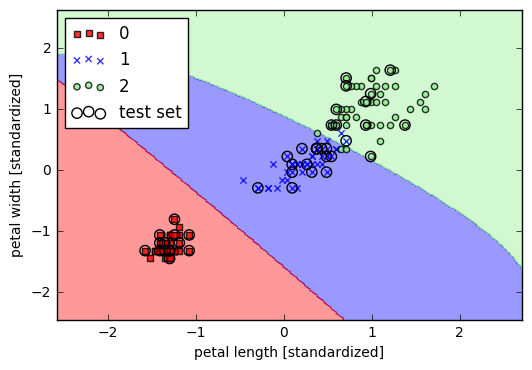

In [10]:
# Plot result
print('Plot result...')
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
Plot.plot_decision_regions(X=X_combined_std, y=y_combined,
                           classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [11]:
# Support vector classifier w/ RBF kernel for Iris datasets and γ = 100
svm = SVC(kernel='rbf', random_state=0, gamma=100, C=1.0)
svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=100, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

Plot result...


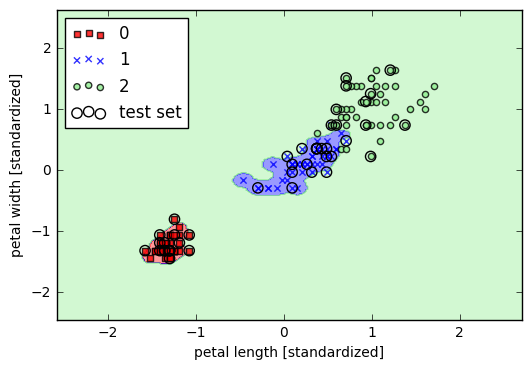

In [12]:
# Plot result
"""
It will a tighter decision boundary outside of class 0 and 1. It is overfitting. Got a higher generalization error.
"""
print('Plot result...')
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
Plot.plot_decision_regions(X=X_combined_std, y=y_combined,
                           classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()